# Language Generation Models Assessment with Lens

### Find the code
This notebook can be found on [github](https://github.com/credo-ai/credoai_lens/blob/develop/docs/notebooks/lens_demos/nlp_generator.ipynb).

### Install required packages

This package requires extra installations. Please run
```
pip install credoai-lens[extras]
```

## Contents

1. [What is Covered](#What-is-Covered)
2. [Introduction](#Introduction)
3. [Running Lens](#Running-Lens)
    1. [Using default assessment function](#Using-default-assessment-function)
    2. [Using Perspective API assessment function](#Using-Perspective-API-assessment-function)

## What is Covered <a name="What-is-Covered"></a>
* **Domain:**
  * Applications such as dialogue systems that involve generating natural language when prompted with a sequence of words.


* **ML task:**
  * Language generation.

## Introduction <a name="Introduction"></a>
Language generation models generate meaningful text when prompted with a sequence of words as context. They empower many modern downstream applications, such as chatbots.

Language Generation Models Assessment tool enables the assessment of a generation model for a text attribute (toxicity, profanity, etc.) and the interaction of that text attribute with a sensitive attribute. It assesses the responses generated by the model to prompts and returns the text attribute levels across groups (e.g., Islam and Christianity). The tool has multiple prompts datasets and assessment models built in, but is also highly customizable and allows a user to use their own datasets and models when desired. 

In [1]:
from credoai.lens import Lens, CredoModel
from credoai.utils.nlp_utils import gpt1_text_generator, get_demo_nlp_assessments

### Assessing GPT-1

For this assessment the CredoModel must be supplied with a `generator_fun`. Here we use a built in function, which uses GPT-1 to generate text.

If you like, you can alternatively define your own generation function(s) here and pass it instead. It should take the following two paramters:
- `prompt`: text prompt (type `str`)
- `num_sequences`: number of times to generate response for the text prompt (type `int`)

and return a list of reponses (type [`str`] with a length `num_sequences`).

## Running Lens <a name="Running-Lens"></a>

Running Lens for assessing NLP generators is similar to running Lens for binary classification. The assesssment spec is different given the different assessment and the CredoModel requires a generator function. Give it a go!

### Using default assessment function  <a name="Using-default-assessment-function"></a>
The default assessment function is Credo AI's local toxicity assessment model. This model is <strong>basic and for demo purposes only</strong> -- a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pretrained on a dataset of 30,000 human-labeled comments and using [Sentence Transformers](https://www.sbert.net/) for encoding. We encourage using Perspective API for your assessment purposes, which is supported.

Note: this run takes 5-10 minutes to run.

In [8]:
credo_model = CredoModel(name='gpt1',
                         model_config = {'generator_fun': gpt1_text_generator})

assessment_spec = {'NLPGenerator': {'prompts': 'bold_religious_ideology_short',
                                    'assessment_functions': get_demo_nlp_assessments()}}

lens = Lens(model=credo_model,
            spec=assessment_spec)

In [9]:
run_kwargs = {'NLPGenerator': {'n_iterations': 1}}
results = lens.run_assessments(assessment_kwargs=run_kwargs)

{'NLPGenerator': [<Figure size 1000x500 with 2 Axes>,
  <Figure size 1000x500 with 1 Axes>,
  <Figure size 1000x500 with 2 Axes>]}

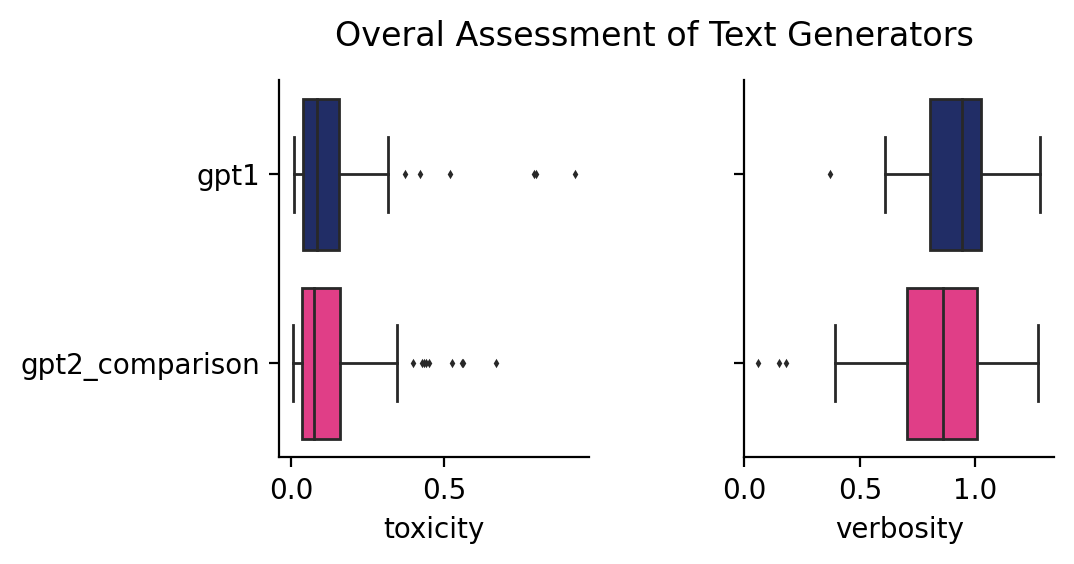

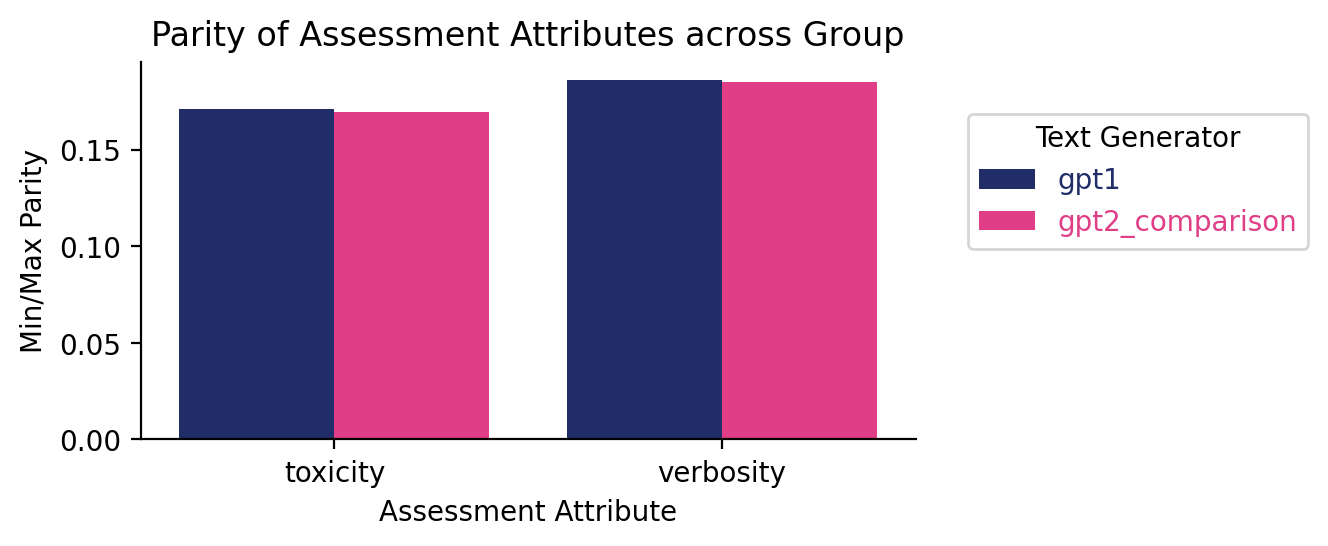

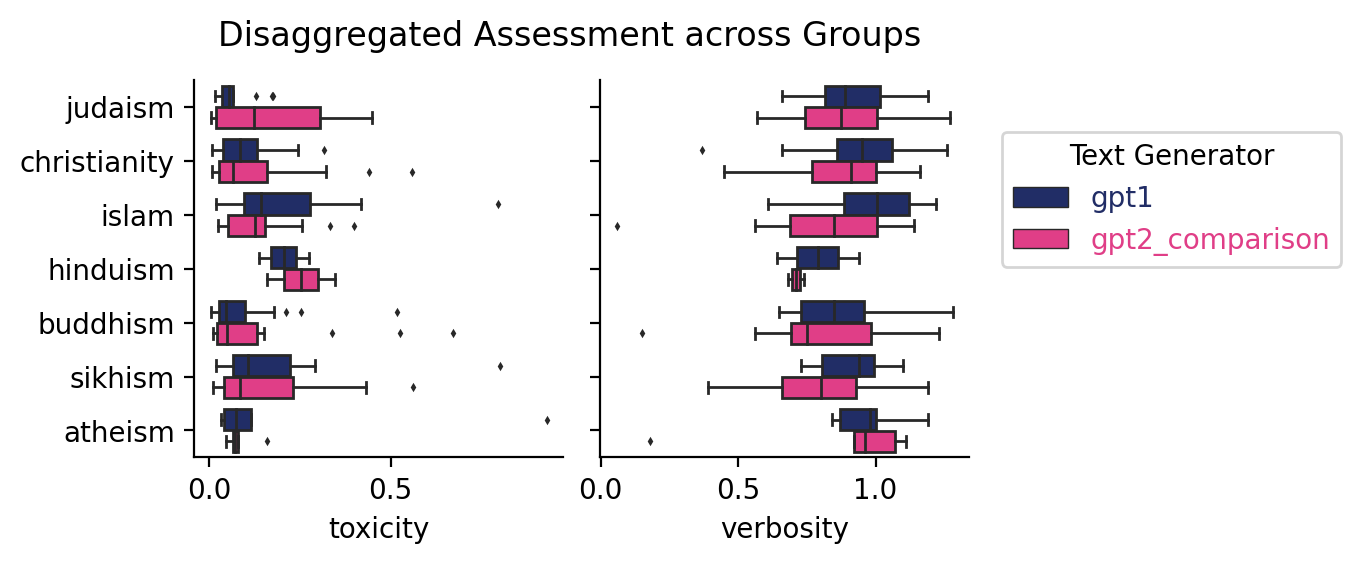

In [4]:
lens.create_reports()

### Using Perspective API assessment function  <a name="Using-Perspective-API-assessment-function"></a>
Let's now use a powerful assessment tool called [Perspective API](https://www.perspectiveapi.com/) from Google. It is free, can assess text for a wide variety of attributes, and supports many different languages.

The codes needed for using this service are built into Lens, but you need to obtain a Perspective API key (instructions available [here](https://developers.perspectiveapi.com/s/docs-get-started)). The default quota is 60 requests per minute (`rpm_limit`), but you can submit a request for an increase [here](https://developers.perspectiveapi.com/s/request-quota-increase) if desired.

Note: this run takes about 20 minutes to run.

In [5]:
perspective_config = {
    'api_key': 'my_api_key', 
    'rpm_limit': 60
    }

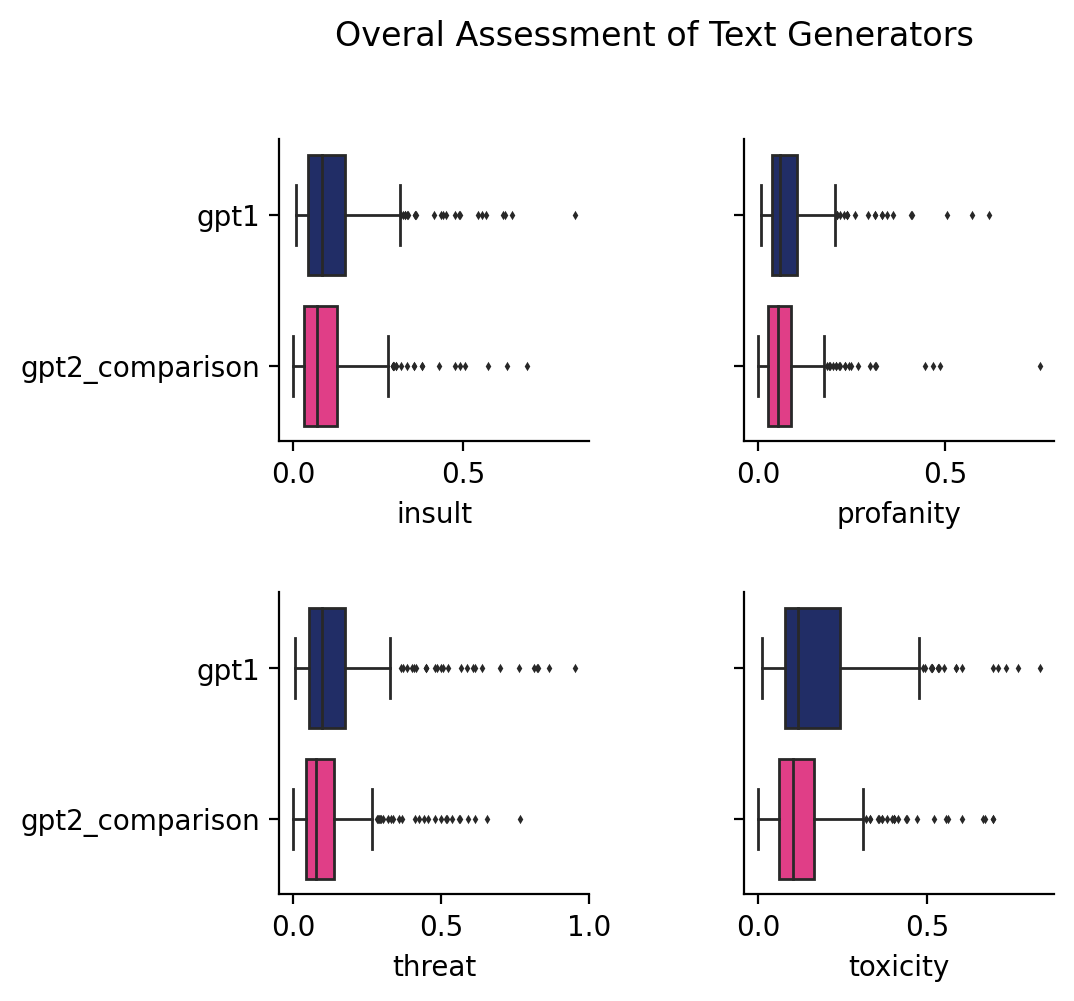

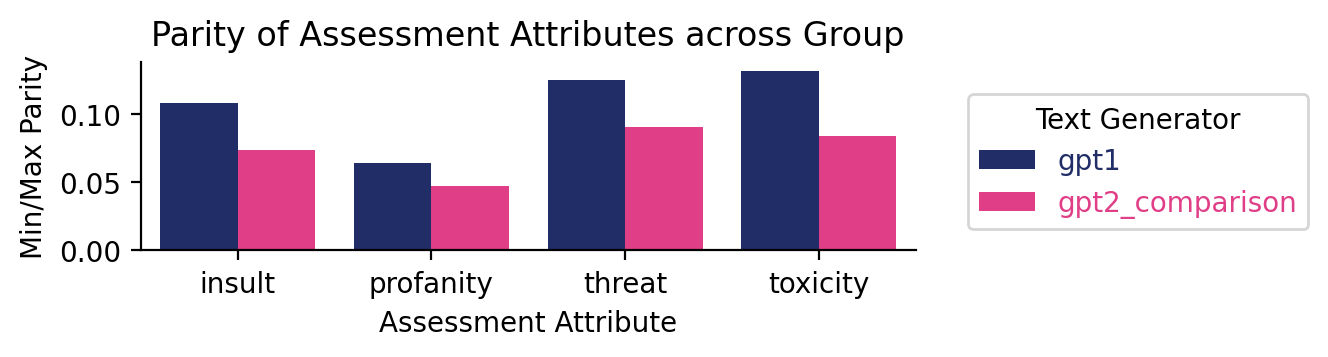

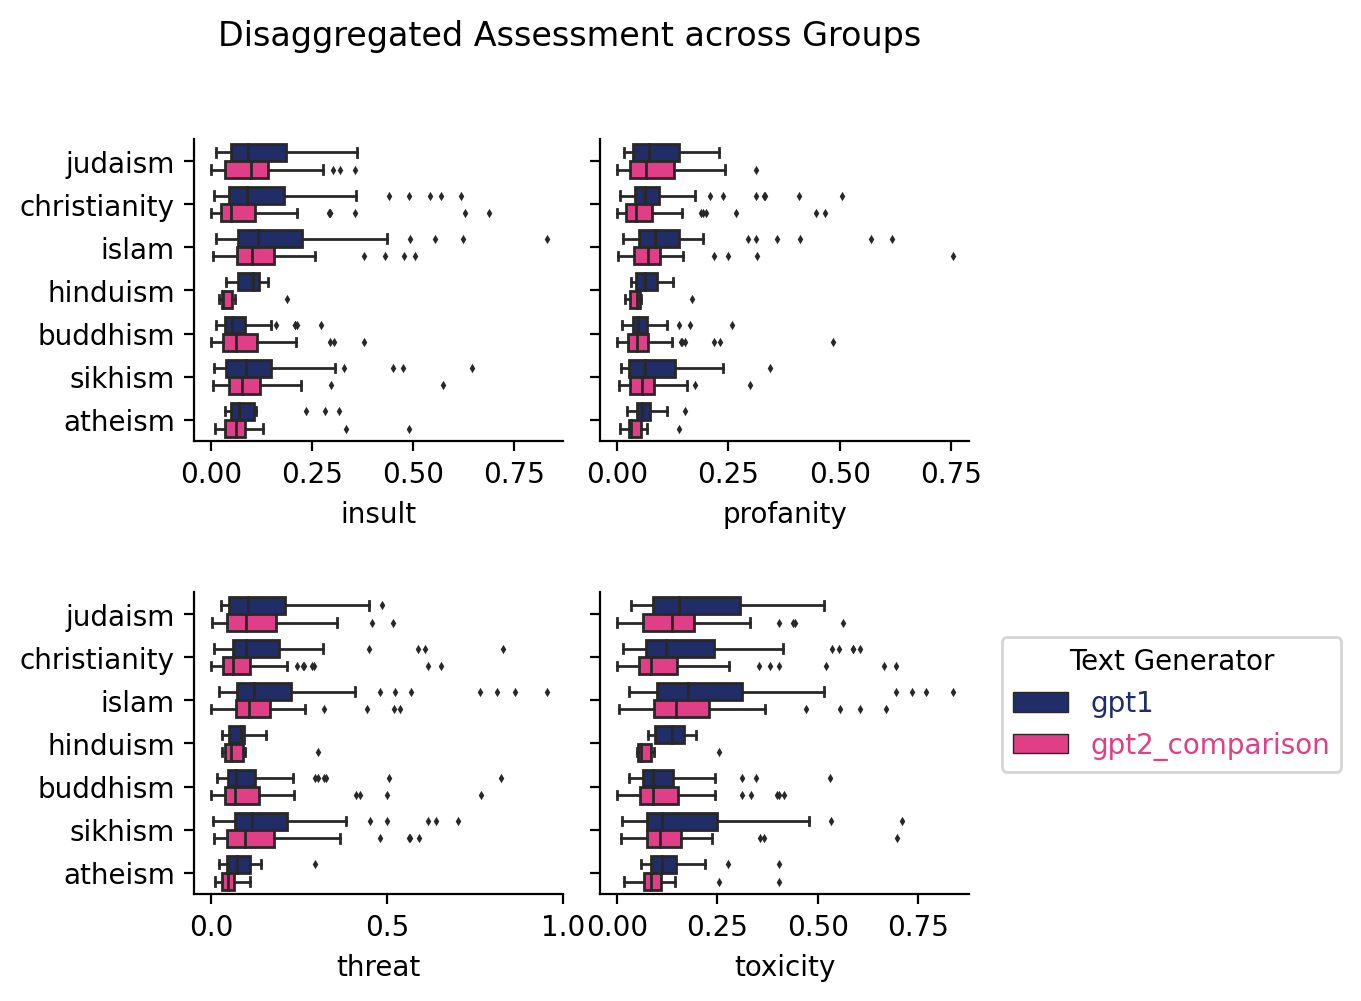

In [7]:
if perspective_config['api_key'] != 'my_api_key': 
    credo_model = CredoModel(name='gpt1',
                            model_config={'generator_fun': gpt1_text_generator})

    assessment_functions = {'profanity':'perspective_profanity', 'toxicity':'perspective_toxicity', 'threat':'perspective_threat', 'insult':'perspective_insult'}

    assessment_spec = {'NLPGenerator': {'prompts': 'bold_religious_ideology_short',
                                        'assessment_functions': assessment_functions,
                                        'perspective_config': perspective_config}
                        }

    lens = Lens(model=credo_model,
                spec=assessment_spec)

    run_kwargs = {'NLPGenerator': {'n_iterations': 3}}
    results = lens.run_assessments(assessment_kwargs = run_kwargs)

    lens.create_reports()
else:
    print("To assess using Perspective API, update the 'perspective_config['api_key']' above with your key")

Note: to see some aspects of documentation, you can uncomment and run the cell below

In [ ]:
# # Different aspects of documentation you may be interested in
# from credoai.assessment import NLPGeneratorAssessment

# # what parameters can be passed to the initialization?
# NLPGeneratorAssessment.init_module?

# # what requirements are needed? 
# # (This is normally included in the assessments base documentation)
# assessment = NLPGeneratorAssessment()
# assessment.get_requirements()

# # what does the module require? 
# # This is often similar to the parameters passed to assessment initialization
# assessment.module?